In [ ]:
import sys
sys.path.append("../src")  # Add src to the Python path


In [ ]:
from data_loader import load_data

In [ ]:
train_df, test_df, valid_df = load_data("../data/liar_dataset")

In [ ]:
valid_df.head()

In [ ]:
from fake_news import load_fakenews_dataset
df = load_fakenews_dataset()


In [ ]:
df.head()

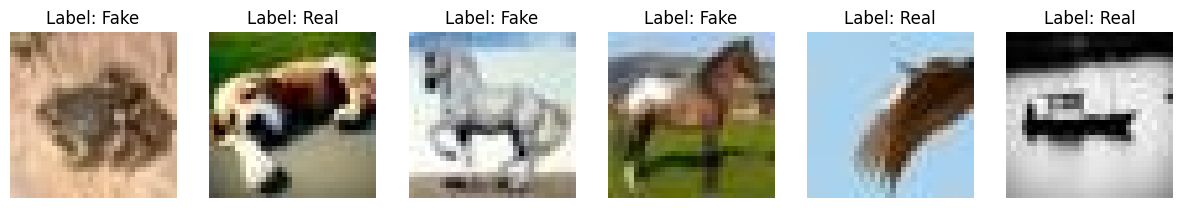

In [2]:
import sys
sys.path.append("../src")

from cifake_loader import load_cifake, show_cifake_images

# Load dataset
train_loader, test_loader = load_cifake(data_path="../data/cifake_images_dataset", batch_size=64)

# Show sample images
show_cifake_images(data_path="../data/cifake_images_dataset", num_images=6)
